<h1>Intro</h1>

Brief introduction of the topic & variables used for analysis

<h1>Loading Packages & Datasets</h1>

In [25]:
! pip install fiona geopandas xgboost gensim folium pyLDAvis descartes mapclassify opendatasets 

In [26]:
! pip install geopandas opendatasets

In [16]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline

import numpy as np
import opendatasets as od

In [17]:
#set seed
np.random.seed(123)

In [18]:
#load datasets

bad_drivers = pd.read_csv("https://raw.githubusercontent.com/mish-salt/323-Group-Project/main/bad-drivers.csv").set_index("State")
#bad drivers by state dataset

insurance_cost = pd.read_csv("https://raw.githubusercontent.com/mish-salt/323-Group-Project/main/auto_insurance_cost.csv").set_index("state")
#insurance cost by state dataset

US_geo = pd.read_csv("https://raw.githubusercontent.com/mish-salt/323-Group-Project/main/US_GeoCode.csv")
#US states longitude and latitude - for mapping 

state_crime = pd.read_csv("https://raw.githubusercontent.com/mish-salt/323-Group-Project/main/state_crime.csv")
#Crimes by state - includes a column for car theft



In [19]:
# #The dataset for car accidents is too large - here we import it directly from Kaggle
accident_data = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'
od.download(accident_data) #download dataset file

#load in dataset
us_accidents = pd.read_csv('us-accidents/US_Accidents_March23.csv', usecols = ["State", "Severity"]) #The dataset is too large - select only the variables of interest


Skipping, found downloaded files in "./us-accidents" (use force=True to force download)


<h1>Viewing Datasets</h1>

In [20]:
bad_drivers.head()

,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Car Insurance Premiums ($),Losses incurred by insurance companies for collisions per insured driver ($)
State,,,,,,,
Alabama,18.8,39,30,96,80,784.55,145.08
Alaska,18.1,41,25,90,94,1053.48,133.93
Arizona,18.6,35,28,84,96,899.47,110.35
Arkansas,22.4,18,26,94,95,827.34,142.39
California,12.0,35,28,91,89,878.41,165.63


In [21]:
insurance_cost.head()

,rank,full_coverage,minimum_coverage,difference
state,,,,
Michigan,1,8723,5282,3441
Rhode Island,2,3847,1589,2258
Louisiana,3,3525,1329,2196
Kentucky,4,3418,1338,2079
Florida,5,3370,2565,805


In [22]:
state_crime.head()

,State,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,...,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
0,Alabama,1960,3266740,1035.4,355.9,592.1,87.3,186.6,138.1,12.4,...,27.5,33823,11626,19344,2853,6097,4512,406,281,898
1,Alabama,1961,3302000,985.5,339.3,569.4,76.8,168.5,128.9,12.9,...,19.1,32541,11205,18801,2535,5564,4255,427,252,630
2,Alabama,1962,3358000,1067.0,349.1,634.5,83.4,157.3,119.0,9.4,...,22.5,35829,11722,21306,2801,5283,3995,316,218,754
3,Alabama,1963,3347000,1150.9,376.9,683.4,90.6,182.7,142.1,10.2,...,24.7,38521,12614,22874,3033,6115,4755,340,192,828
4,Alabama,1964,3407000,1358.7,466.6,784.1,108.0,213.1,163.0,9.3,...,29.1,46290,15898,26713,3679,7260,5555,316,397,992


In [23]:
US_geo.head()

,state&teritory,latitude,longitude,Name
0,AK,63.588753,-154.493062,Alaska
1,AL,32.318231,-86.902298,Alabama
2,AR,35.201050,-91.831833,Arkansas
3,AZ,34.048928,-111.093731,Arizona
4,CA,36.778261,-119.417932,California


In [24]:
us_accidents.head()

,Severity,State
0,3,OH
1,2,OH
2,2,OH
3,3,OH
4,2,OH


<h1>Data Wrangling</h1>

For visualizing the correlation between these variables & insurance prices

In [74]:
#merging bad driver data with insurance data
df1 = pd.merge(insurance_cost, bad_drivers, left_on = "state", right_index = True)
#clean the crime dataset, use only obeservations from 2019, the closest time to 2020 in the dataset
crime_data = state_crime.loc[state_crime.Year == 2019]


#continue to merge it with the rate of stolen cars from the crime dataset


df2 = pd.merge(df1, crime_data, left_on = "state", right_on = "State").set_index("State")



#clean up the dataset - exclude columns that are not needed 
col_list = ["full_coverage",
            "minimum_coverage", 
            "difference", 
            "Number of drivers involved in fatal collisions per billion miles",
           "Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding",
           "Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired",
           "Data.Rates.Property.Motor"]
df3 = df2.loc[:, col_list]
#changing some variable names

plotting_data = df3.rename(columns = {"Data.Rates.Property.Motor":"stolen_cars_per_100k"}) #the variable refers to the number of stolen cars per 100,000 population

plotting_data.head()

,full_coverage,minimum_coverage,difference,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,stolen_cars_per_100k
State,,,,,,,
Michigan,8723,5282,3441,14.1,24,28,177.7
Rhode Island,3847,1589,2258,11.1,34,38,128.2
Louisiana,3525,1329,2196,20.5,35,33,230.5
Kentucky,3418,1338,2079,21.4,19,23,228.2
Florida,3370,2565,805,17.9,21,29,181.8


<h1>Mapping Insurance Prices by State</h1>

In [75]:
#Get geodata of US by state
url = "tl_2023_us_state.shp"
us_geodata = gpd.read_file(url).set_index("NAME").loc[:,"geometry"]


In [76]:
us_geodata.head()


NAME
West Virginia    POLYGON ((-77.75438 39.33346, -77.75422 39.333...
Florida          MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ...
Illinois         POLYGON ((-87.89243 38.28285, -87.89334 38.282...
Minnesota        POLYGON ((-95.31991 48.99892, -95.31778 48.998...
Maryland         POLYGON ((-75.75600 39.24607, -75.75579 39.243...
Name: geometry, dtype: geometry

In [78]:
# #merge the insurance data with the geodata for mapping, transform it into geodataframe
ins_geo = gpd.GeoDataFrame(pd.merge(insurance_cost, us_geodata, how = "left", left_index = True, right_index = True))
ins_geo.head()

,rank,full_coverage,minimum_coverage,difference,geometry
state,,,,,
Michigan,1,8723,5282,3441,"POLYGON ((-87.11270 47.81800, -87.06310 47.799..."
Rhode Island,2,3847,1589,2258,"MULTIPOLYGON (((-71.67881 41.15891, -71.67626 ..."
Louisiana,3,3525,1329,2196,"POLYGON ((-92.72474 33.01439, -92.72365 33.014..."
Kentucky,4,3418,1338,2079,"MULTIPOLYGON (((-89.57120 36.55214, -89.57114 ..."
Florida,5,3370,2565,805,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."


(-130.0, -65.0, 20.0, 55.0)

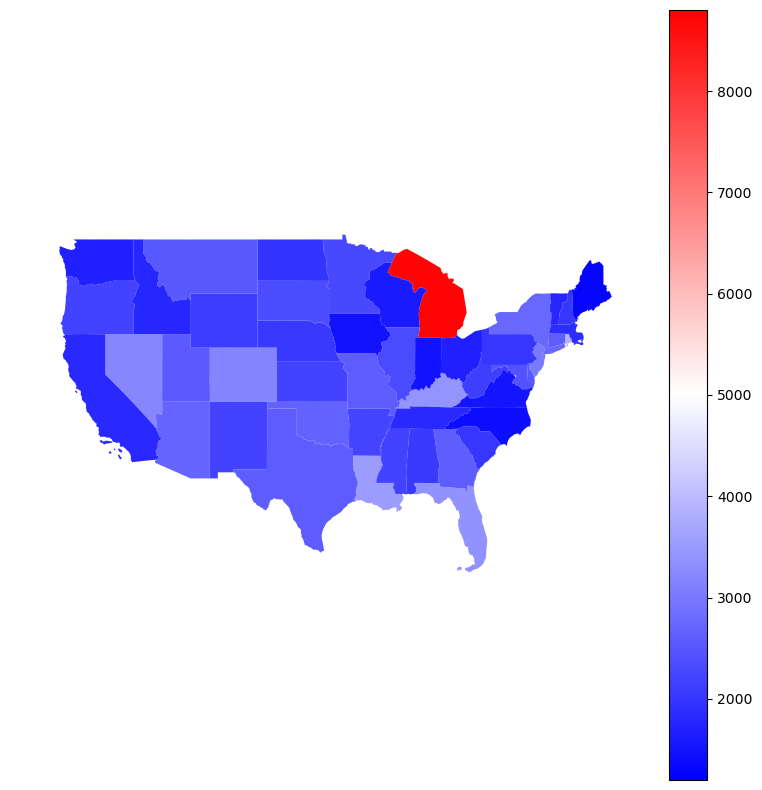

In [79]:
gfig, gax = plt.subplots(figsize = (10,10)) #initialze plot

ins_geo.plot(column="full_coverage", cmap="bwr", linewidth=0.4, ax=gax, vmin=1200, vmax=8800, legend = True)

# #focus on continental US
gax.set_xlim(-130, -65)
gax.set_ylim(20, 55)

plt.axis('off')


In [ ]:
ins_geo.dtypes["full_coverage"]

In [9]:
#making an interactive map
from bokeh.io import output_notebook
from bokeh.plotting import figure, ColumnDataSource
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, HoverTool
from bokeh.palettes import brewer
output_notebook()
import json



Loading BokehJS ...

In [ ]:
# ins_geo_int = ins_geo.reset_index() #The same geodataset with reset indeces
# ins_geo_int.head()

In [8]:
# insurance_geojson=GeoJSONDataSource(geojson=ins_geo_int.to_json())

# color_mapper = LinearColorMapper(palette = brewer['RdBu'][10], low = 0, high = 8800)
# color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
#                      border_line_color=None,location = (0,0), orientation = 'horizontal')
# hover = HoverTool(tooltips = [ ('State','@state'), ('Full Coverage','@full_coverage'),('Minimum Coverage', '@minimum_coverage'),
#                                ('Difference between Full and Min Coverage','@difference')])
# p = figure(title="Insurance Prices Across States", tools=[hover])
# p.patches("xs","ys",source= insurance_geojson,
#           fill_color = {'field' :'full_coverage', 'transform' : color_mapper})
# # p.add_layout(color_bar, 'below')
# show(p)


NameError: name 'GeoJSONDataSource' is not defined

<h1>Visualizing Correlation between Independent Variables and State Average Insurance Prices</h1>